# Understanding How Car Weight Affects the Relationship Between Horsepower and Fuel Efficiency

In [1]:
pip install ucimlrepo

SyntaxError: invalid syntax (1803925118.py, line 3)

In [1]:
pip install nbconvert


Note: you may need to restart the kernel to use updated packages.


## Installing the auto_mpg dataset 

In [15]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import scipy as sp
from scipy import stats
from statsmodels.graphics.gofplots import qqplot


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [16]:
X_df = pd.DataFrame(auto_mpg['data']['original'])

y_df = pd.DataFrame(auto_mpg['data']['targets'], columns=['mpg'])

auto_mpg_df = pd.concat([X_df, y_df], axis=1)
auto_mpg['data']


{'ids':                       car_name
 0    chevrolet,chevelle,malibu
 1            buick,skylark,320
 2           plymouth,satellite
 3                amc,rebel,sst
 4                  ford,torino
 ..                         ...
 393            ford,mustang,gl
 394                  vw,pickup
 395              dodge,rampage
 396                ford,ranger
 397                 chevy,s-10
 
 [398 rows x 1 columns],
 'features':      displacement  cylinders  horsepower  weight  acceleration  model_year  \
 0           307.0          8       130.0    3504          12.0          70   
 1           350.0          8       165.0    3693          11.5          70   
 2           318.0          8       150.0    3436          11.0          70   
 3           304.0          8       150.0    3433          12.0          70   
 4           302.0          8       140.0    3449          10.5          70   
 ..            ...        ...         ...     ...           ...         ...   
 393         140.

In [17]:
#3.1
#Identify Field Types
print("Column Types")
print(auto_mpg_df.dtypes)
print(auto_mpg_df.describe())
print("Total empty rows per column")
print(auto_mpg_df.isnull().sum())
print(auto_mpg_df.info())
print(auto_mpg_df.shape)

Column Types
car_name         object
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
mpg             float64
mpg             float64
dtype: object
        cylinders  displacement  horsepower       weight  acceleration  \
count  398.000000    398.000000  392.000000   398.000000    398.000000   
mean     5.454774    193.425879  104.469388  2970.424623     15.568090   
std      1.701004    104.269838   38.491160   846.841774      2.757689   
min      3.000000     68.000000   46.000000  1613.000000      8.000000   
25%      4.000000    104.250000   75.000000  2223.750000     13.825000   
50%      4.000000    148.500000   93.500000  2803.500000     15.500000   
75%      8.000000    262.000000  126.000000  3608.000000     17.175000   
max      8.000000    455.000000  230.000000  5140.000000     24.800000   

       model_year      origin         mpg         mpg  
count  398

In [18]:
#3.2
cor_mat = auto_mpg_df.select_dtypes(include='number').corr()
print(cor_mat)

#np.fill_diagonal(cor_mat.values, np.nan)

#upper = cor_mat.where(~cor_mat.isna(), 0).values
#print(upper)

#Metrics model_year time series

#Total Vehicles 
#Avg Weight 
#Avg horsepower
#Avg mpg

#Top 5 mpg, hp,weight
#Bottom 5 mpg hp,weight

#Corr between mpg and horsepower (car_make)
#Corr between mpg and fuel efficency (car_make)
#Corr between horsepower and fuel efficency (car_make)


#Range of Horsepower
#Range of mpg
#Range of weight
 

              cylinders  displacement  horsepower    weight  acceleration  \
cylinders      1.000000      0.950721    0.842983  0.896017     -0.505419   
displacement   0.950721      1.000000    0.897257  0.932824     -0.543684   
horsepower     0.842983      0.897257    1.000000  0.864538     -0.689196   
weight         0.896017      0.932824    0.864538  1.000000     -0.417457   
acceleration  -0.505419     -0.543684   -0.689196 -0.417457      1.000000   
model_year    -0.348746     -0.370164   -0.416361 -0.306564      0.288137   
origin        -0.562543     -0.609409   -0.455171 -0.581024      0.205873   
mpg           -0.775396     -0.804203   -0.778427 -0.831741      0.420289   
mpg           -0.775396     -0.804203   -0.778427 -0.831741      0.420289   

              model_year    origin       mpg       mpg  
cylinders      -0.348746 -0.562543 -0.775396 -0.775396  
displacement   -0.370164 -0.609409 -0.804203 -0.804203  
horsepower     -0.416361 -0.455171 -0.778427 -0.778427  
w

In [19]:
#3.2 Cont'd
# Metrics
total_vehicles = len(auto_mpg_df)  # Total number of vehicles
avg_weight = auto_mpg_df['weight'].mean()  # Average weight
avg_horsepower = auto_mpg_df['horsepower'].mean()  # Average horsepower
avg_mpg = auto_mpg_df['mpg'].mean()  # Average mpg

top_5_mpg = auto_mpg_df['mpg'].head(5)  # Top 5 cars by mpg
bottom_5_mpg = auto_mpg_df['mpg'].tail(5)  # Bottom 5 cars by mpg

top_5_hp = auto_mpg_df['horsepower'].head(5)  # Top 5 cars by horsepower
bottom_5_hp = auto_mpg_df['horsepower'].tail(5)  # Bottom 5 cars by horsepower

top_5_weight = auto_mpg_df['weight'].head(5)  # Top 5 cars by weight
bottom_5_weight = auto_mpg_df['weight'].tail(5)  # Bottom 5 cars by weight

#corr_mpg_hp = auto_mpg_df['mpg'].corr(auto_mpg_df['horsepower'])  # Correlation between mpg and horsepower
#corr_mpg_efficiency = auto_mpg_df['mpg'].corr(auto_mpg_df['mpg'])  # Correlation between mpg and itself (redundant)
#corr_hp_efficiency = auto_mpg_df['horsepower'].corr(auto_mpg_df['mpg'])  # Correlation between horsepower and mpg
#range_hp = auto_mpg_df['horsepower'].max() - auto_mpg_df['horsepower'].min()  # Range of horsepower
range_mpg = auto_mpg_df['mpg'].max() - auto_mpg_df['mpg'].min()  # Range of mpg
range_weight = auto_mpg_df['weight'].max() - auto_mpg_df['weight'].min()  # Range of weight

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [20]:
#3.3
df= auto_mpg_df['car_name'].str.split(',', expand=True)
df['car_model'] = df[1] + ' ' + (df[2].fillna('') + ' ' + df[3].fillna('') + ' ' +  df[4].fillna('') + df[5].fillna('').astype(str)).str.strip()
df = df.rename(columns={0: 'car_make'})

del df[2]
del  df[1]
del df[3]
del  df[4]
del df[5]
df

d1=auto_mpg_df.join(df)


In [21]:
d1 = d1.loc[:, ~d1.columns.duplicated()]
#Combine values in one for a categorical variable.
#Correct spelling for car make names 
d1.loc[d1['car_make'] == 'toyouta', 'car_make'] = 'toyota'
d1.loc[d1['car_make'] == 'vokswagen', 'car_make'] = 'volkswagen'
d1.loc[d1['car_make'] == 'mercedes', 'car_make'] = 'mercedes-benz'
d1.loc[d1['car_make'] == 'maxda', 'car_make'] = 'mazda'
d1.loc[d1['car_make'] == 'vw', 'car_make'] = 'volkswagen'
d1.loc[d1['car_make'] == 'chevroelt', 'car_make'] = 'chevrolet'
d1.loc[d1['car_make'] == 'capri', 'car_model'] = 'capri ii'

d1.loc[d1['car_make'] == 'capri', 'car_make'] = 'ford'


d1.loc[d1['car_model'].isnull(),'car_model'] = 'The car model is not available'
d1

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,car_make,car_model
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0,chevrolet,chevelle malibu
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0,buick,skylark 320
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0,plymouth,satellite
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0,amc,rebel sst
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
393,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0,ford,mustang gl
394,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0,volkswagen,pickup
395,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0,dodge,rampage
396,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0,ford,ranger


In [22]:
#3.4
print(d1.isnull().sum())

car_name        0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
car_make        0
car_model       0
dtype: int64


In [23]:
#3.5
#Fill empty based on average for car make 
#Fill by impution
d1.loc[d1['horsepower'].isnull(),'horsepower']=d1.groupby('car_make')['horsepower'].transform(lambda x: x.fillna(x.mean()))
print(d1.isnull().sum())


car_name        0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
car_make        0
car_model       0
dtype: int64


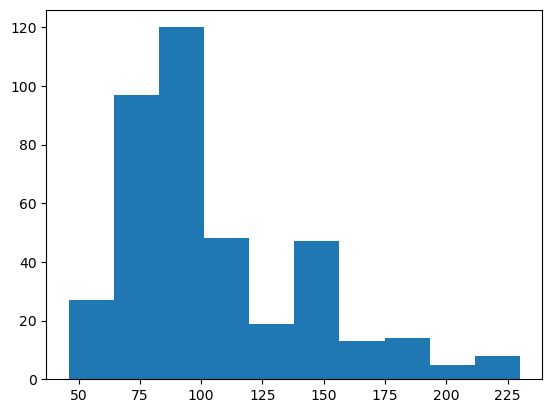

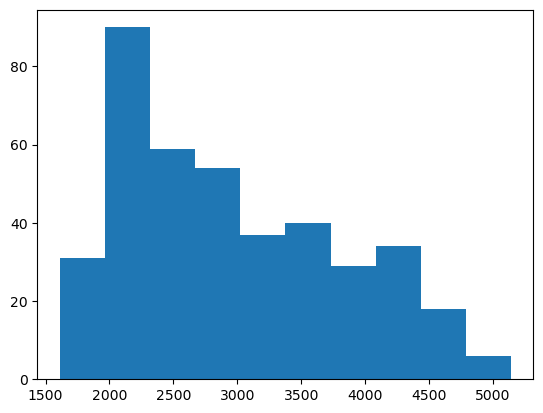

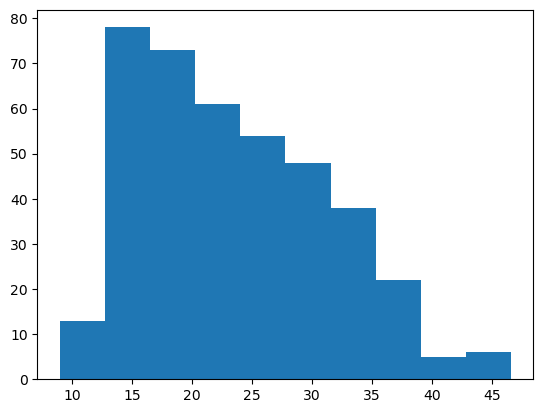

In [24]:
plt.hist(d1['horsepower'])
plt.show()
plt.hist(d1['weight'])
plt.show()
plt.hist(d1['mpg'])
plt.show()

In [25]:
#Outlier Detection & Removal 
#Horsepower
q1=d1["horsepower"].quantile(0.25)
q3=d1["horsepower"].quantile(0.75)

IQR=q3-q1
threshold=1.5
outliers = d1[(d1['horsepower'] < q1 - threshold * IQR) | (d1['horsepower'] > q3 + threshold * IQR)]
outliers #There are 10 outlier values.
d1 = pd.merge(d1, outliers, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [26]:
outliers

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,car_make,car_model
6,"chevrolet,impala",8,454.0,220.0,4354,9.0,70,1,14.0,chevrolet,impala
7,"plymouth,fury,iii",8,440.0,215.0,4312,8.5,70,1,14.0,plymouth,fury iii
8,"pontiac,catalina",8,455.0,225.0,4425,10.0,70,1,14.0,pontiac,catalina
13,"buick,estate,wagon,(sw)",8,455.0,225.0,3086,10.0,70,1,14.0,buick,estate wagon (sw)
25,"ford,f250",8,360.0,215.0,4615,14.0,70,1,10.0,ford,f250
27,"dodge,d200",8,318.0,210.0,4382,13.5,70,1,11.0,dodge,d200
67,"mercury,marquis",8,429.0,208.0,4633,11.0,72,1,11.0,mercury,marquis
94,"chrysler,new,yorker,brougham",8,440.0,215.0,4735,11.0,73,1,13.0,chrysler,new yorker brougham
95,"buick,electra,225,custom",8,455.0,225.0,4951,11.0,73,1,12.0,buick,electra 225 custom
116,"pontiac,grand,prix",8,400.0,230.0,4278,9.5,73,1,16.0,pontiac,grand prix


In [27]:
#Weight
q1=d1["weight"].quantile(0.25)
q3=d1["weight"].quantile(0.75)

IQR=q3-q1
threshold=1.5
horse_outliers = d1[(d1['weight'] < q1 - threshold * IQR) | (d1['weight'] > q3 + threshold * IQR)]
print(horse_outliers) #There are 10 outlier values.
d1 = pd.merge(d1, horse_outliers, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
d1


Empty DataFrame
Columns: [car_name, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, mpg, car_make, car_model]
Index: []


,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,car_make,car_model
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0,chevrolet,chevelle malibu
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0,buick,skylark 320
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0,plymouth,satellite
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0,amc,rebel sst
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
383,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0,ford,mustang gl
384,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0,volkswagen,pickup
385,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0,dodge,rampage
386,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0,ford,ranger


In [28]:
#mpg
q1=d1["mpg"].quantile(0.25)
q3=d1["mpg"].quantile(0.75)

IQR=q3-q1
threshold=1.5
mpg_outliers = d1[(d1['mpg'] < q1 - threshold * IQR) | (d1['mpg'] > q3 + threshold * IQR)]
print(mpg_outliers) #There are 1 outlier values.
d1 = pd.merge(d1, mpg_outliers, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
d1

      car_name  cylinders  displacement  horsepower  weight  acceleration  \
312  mazda,glc          4          86.0        65.0    2110          17.9   

     model_year  origin   mpg car_make car_model  
312          80       3  46.6    mazda      glc   


,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,car_make,car_model
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0,chevrolet,chevelle malibu
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0,buick,skylark 320
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0,plymouth,satellite
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0,amc,rebel sst
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
383,"ford,mustang,gl",4,140.0,86.0,2790,15.6,82,1,27.0,ford,mustang gl
384,"vw,pickup",4,97.0,52.0,2130,24.6,82,2,44.0,volkswagen,pickup
385,"dodge,rampage",4,135.0,84.0,2295,11.6,82,1,32.0,dodge,rampage
386,"ford,ranger",4,120.0,79.0,2625,18.6,82,1,28.0,ford,ranger


In [29]:
cleaned_df=d1

In [30]:
#4.1
print(cleaned_df['mpg'].skew()) # The data is positively moderately skewed to the right 
print(cleaned_df['horsepower'].skew()) # The data is positively and significantly skewed to the right
print(cleaned_df['weight'].skew()) # This suggest a moderate right skew.



0.4219941961233609
0.8588354741755796
0.5573561497886387


In [14]:
#cleaned_df.to_csv("cleaned_df.csv")


mpg


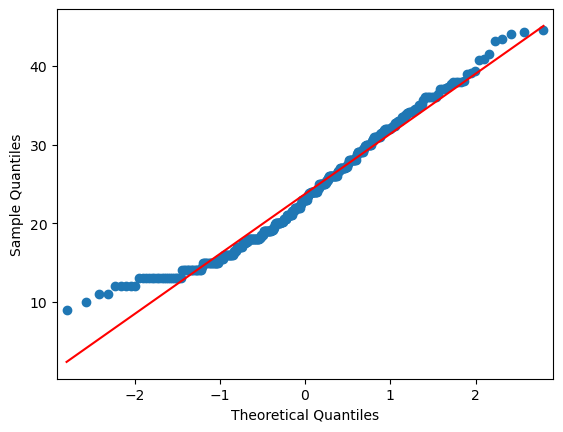

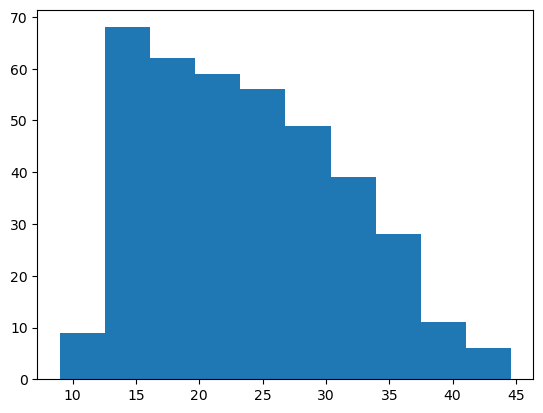

In [31]:
#4.2
print("mpg")
qqplot(cleaned_df['mpg'],line='s')
plt.show()

plt.hist(cleaned_df['mpg'])
plt.show()


horsepower


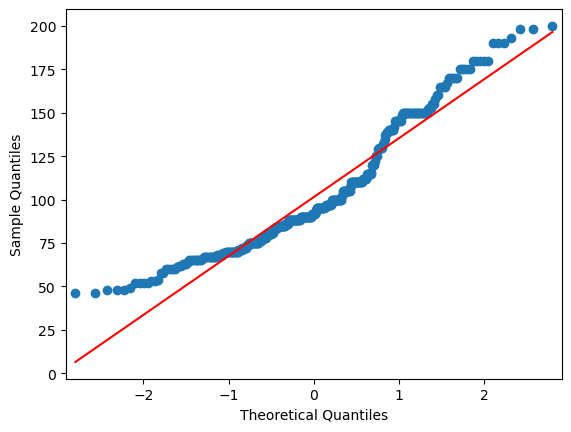

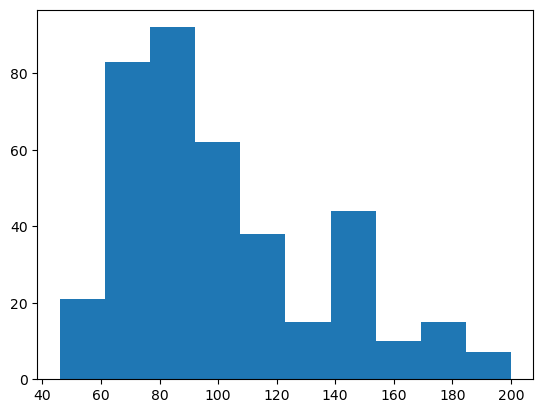

In [32]:

print("horsepower")
qqplot(cleaned_df['horsepower'],line='s')
plt.show()

plt.hist(cleaned_df['horsepower'])
plt.show()

weight


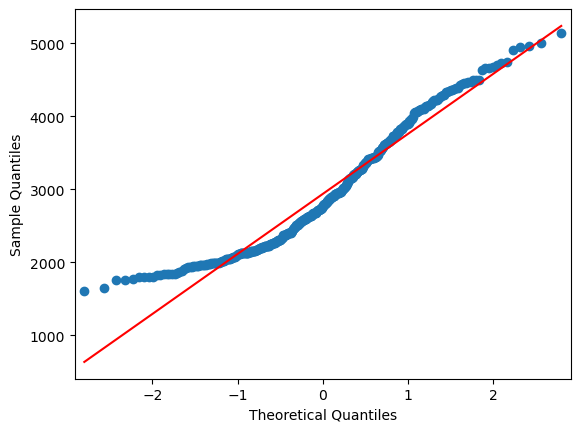

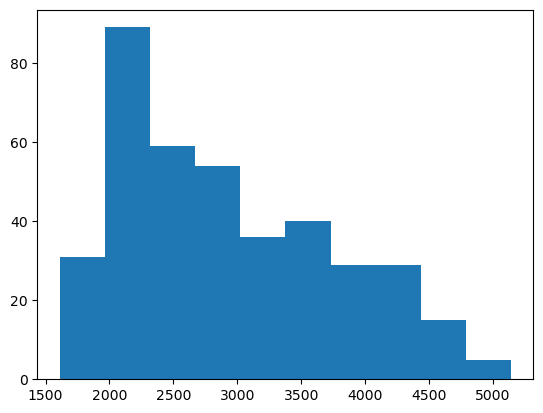

In [33]:
print("weight")
qqplot(cleaned_df['weight'],line='s')
plt.show()
plt.hist(cleaned_df['weight'])
plt.show()

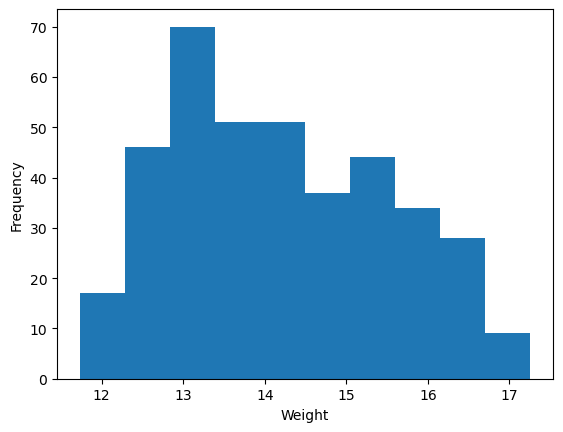

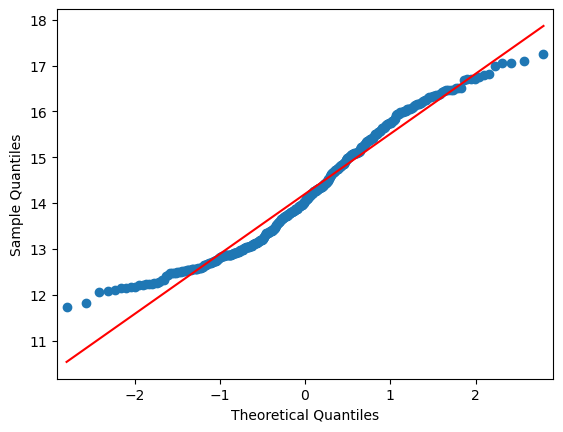

In [34]:
#4.3
cleaned_df['cbrt_weight']  = np.cbrt(cleaned_df['weight'])
plt.hist(cleaned_df['cbrt_weight'])
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.savefig('skew-w.png')
plt.show()

qqplot(cleaned_df['cbrt_weight'],line='s')
plt.savefig('qq-w.png')
plt.show()

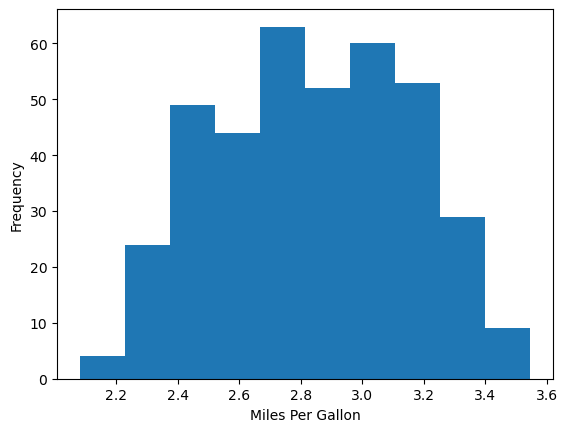

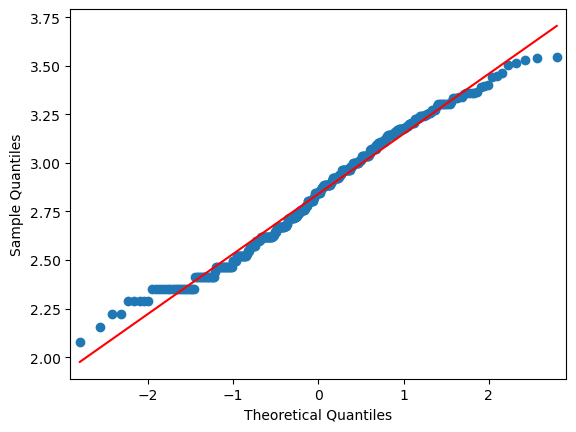

In [35]:
cleaned_df['cbrt_mpg']  = np.cbrt(cleaned_df['mpg'])

plt.hist(cleaned_df['cbrt_mpg'])
plt.xlabel('Miles Per Gallon')
plt.ylabel('Frequency')
plt.savefig('skew-m.png')
plt.show()

qqplot(cleaned_df['cbrt_mpg'],line='s')
plt.savefig('qq-m.png')
plt.show()

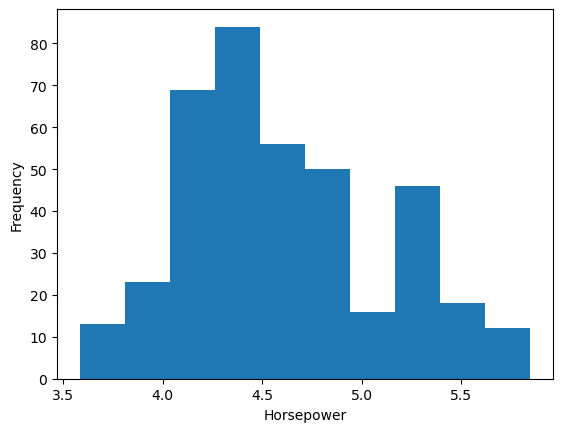

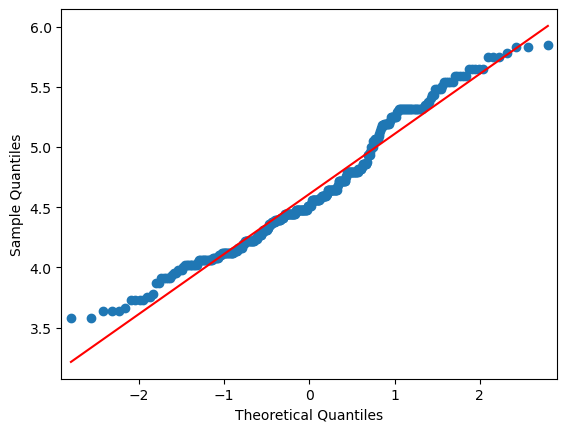

In [36]:
cleaned_df['cbrt_horsepower']  = np.cbrt(cleaned_df['horsepower'])

plt.hist(cleaned_df['cbrt_horsepower'])
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.savefig('skew-h.png')
plt.show()

qqplot(cleaned_df['cbrt_horsepower'],line='s')
plt.savefig('qq-h.png')
plt.show()


In [52]:
print("-------Before CBRT -----------") 
print(cleaned_df['mpg'].skew()) # The data is positively moderately skewed to the right 
print(cleaned_df['horsepower'].skew()) # The data is positively and significantly skewed to the right
print(cleaned_df['weight'].skew()) # This suggest a moderate right skew.
print("------------------")
print("-------After CBRT -----------") 

print(cleaned_df['cbrt_mpg'].skew()) # The data is positively moderately skewed to the right 
print(cleaned_df['cbrt_horsepower'].skew()) # The data is positively and significantly skewed to the right
print(cleaned_df['cbrt_weight'].skew()) # This suggest a moderate right skew.

print("------------------")
print("-----Differences-----")

print( ( 100 + ((cleaned_df['cbrt_mpg'].skew() - cleaned_df['mpg'].skew()) / cleaned_df['mpg'].skew() ) * 100 ))
print(( 100 +((cleaned_df['cbrt_horsepower'].skew() - cleaned_df['horsepower'].skew()) / cleaned_df['horsepower'].skew() ) * 100) )
print(( 100 +((cleaned_df['cbrt_weight'].skew() - cleaned_df['weight'].skew()) / cleaned_df['weight'].skew() ) * 100 ))









-------Before CBRT -----------
0.4219941961233609
0.8588354741755796
0.5573561497886387
------------------
-------After CBRT -----------
0.043202159174306115
0.4592277151736769
0.2999828596442174
------------------
-----Differences-----
10.237619277985715
53.47097657027995
53.82247235595719


In [53]:
#Questions to answer
cleaned_df.head(10)

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,car_make,car_model,cbrt_weight,cbrt_mpg,cbrt_horsepower
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0,chevrolet,chevelle malibu,15.188727,2.620741,5.065797
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0,buick,skylark 320,15.457044,2.466212,5.484807
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0,plymouth,satellite,15.089831,2.620741,5.313293
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0,amc,rebel sst,15.085438,2.519842,5.313293
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0,ford,torino,15.108838,2.571282,5.192494
5,"ford,galaxie,500",8,429.0,198.0,4341,10.0,70,1,15.0,ford,galaxie 500,16.312853,2.466212,5.828477
6,"amc,ambassador,dpl",8,390.0,190.0,3850,8.5,70,1,15.0,amc,ambassador dpl,15.673052,2.466212,5.748897
7,"dodge,challenger,se",8,383.0,170.0,3563,10.0,70,1,15.0,dodge,challenger se,15.273501,2.466212,5.539658
8,"plymouth,'cuda,340",8,340.0,160.0,3609,8.0,70,1,14.0,plymouth,'cuda 340,15.338950,2.410142,5.428835
9,"chevrolet,monte,carlo",8,400.0,150.0,3761,9.5,70,1,15.0,chevrolet,monte carlo,15.551339,2.466212,5.313293
